In [1]:
%matplotlib inline

In [2]:
import time
import numpy

import matplotlib as mpl
#mpl.use('Agg')
import matplotlib.pyplot as plt

from nearpy import Engine
from nearpy.hashes import RandomDiscretizedProjections
from nearpy.filters import NearestFilter, UniqueFilter
from nearpy.distances import EuclideanDistance
from nearpy.experiments import DistanceRatioExperiment

In [3]:
# Set dimension and vector count for this experiment
dimension = 100
vector_count = 10000


In [4]:
# Create data set from two clusters
vectors = []


In [5]:
center = numpy.random.randn(dimension)
for index in range(vector_count//2):
    vector = center + 0.01 * numpy.random.randn(dimension)
    vectors.append(vector)


center = numpy.random.randn(dimension)
for index in range(vector_count//2):
    vector = center + 0.01 * numpy.random.randn(dimension)
    vectors.append(vector)
    

In [6]:
# We are looking for the ten closest neighbours
nearest = NearestFilter(10)
# We want unique candidates
unique = UniqueFilter()


In [7]:
# We will fill this array with all the engines we want to test
engines = []

print('Creating engines...')


Creating engines...


In [8]:
# We are going to test these bin widths
bin_widths = [ 0.0002 * x for x in range(1,10)]


In [9]:
# Create engines for all configurations
for bin_width in bin_widths:
    # Use four random 1-dim discretized projections
    rdp1 = RandomDiscretizedProjections('rdp1', 1, bin_width)
    rdp2 = RandomDiscretizedProjections('rdp2', 1, bin_width)
    rdp3 = RandomDiscretizedProjections('rdp3', 1, bin_width)
    rdp4 = RandomDiscretizedProjections('rdp4', 1, bin_width)

    # Create engine with this configuration
    engine = Engine(dimension, lshashes=[rdp1, rdp2, rdp3, rdp4],distance=EuclideanDistance(), vector_filters=[unique, nearest])

    # Add engine to list of engines to evaluate
    engines.append(engine)


*** engine init done ***
*** engine init done ***
*** engine init done ***
*** engine init done ***
*** engine init done ***
*** engine init done ***
*** engine init done ***
*** engine init done ***
*** engine init done ***


In [10]:
print('Creating experiment and performing exact search...')

# Create experiment (looking for ten closest neighbours).
# The constructor performs exact search for evaluation.
# So the data set should not be too large for experiments.
exp = DistanceRatioExperiment(10, vectors, coverage_ratio=0.2)


Creating experiment and performing exact search...

Starting exact search (query set size=2000)...

\Done with exact search...



In [11]:
print('Performing experiment for all engines...')

# Perform experiment for all engines
result = exp.perform_experiment(engines)


Performing experiment for all engines...
Engine 0 / 9
  distance_ratio=0.164229, result_size=9.127000, time=0.075510
Engine 1 / 9
  distance_ratio=0.126410, result_size=9.970500, time=0.122483
Engine 2 / 9
  distance_ratio=0.108793, result_size=9.995000, time=0.158802
Engine 3 / 9
  distance_ratio=0.095314, result_size=9.999000, time=0.206491
Engine 4 / 9
  distance_ratio=0.088199, result_size=10.000000, time=0.257789
Engine 5 / 9
  distance_ratio=0.081705, result_size=10.000000, time=0.300418
Engine 6 / 9
  distance_ratio=0.080154, result_size=10.000000, time=0.309375
Engine 7 / 9
  distance_ratio=0.074659, result_size=10.000000, time=0.347471
Engine 8 / 9
  distance_ratio=0.070245, result_size=10.000000, time=0.394115


In [12]:
# Collect these measures from all result items
distance_ratios = []
searchtimes = []
resultsizes= []


In [13]:
for item in result:
    distance_ratios.append(item[0])
    resultsizes.append(item[1])
    searchtimes.append(item[2])


Plotting resulting graph...


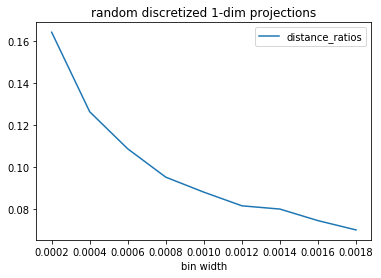

In [14]:
print('Plotting resulting graph...')

# Plot measures
ticks = bin_widths
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ticks, distance_ratios)
ax.legend(['distance_ratios'],loc='upper right')
ax.set_xlabel('bin width')
ax.set_title('random discretized 1-dim projections')
fig.savefig('distance_ratios.png')


#### The lower the distance ratio, the better the quality is. As we can see, increasing the  'bin width' increases the quality  

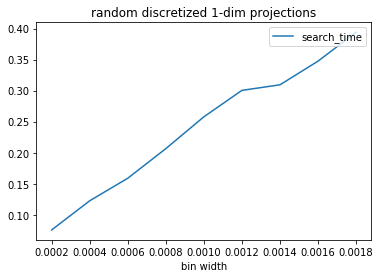

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ticks, searchtimes)
ax.legend(['search_time'],loc='upper right')
ax.set_xlabel('bin width')
ax.set_title('random discretized 1-dim projections')
fig.savefig('times.png')
